# Module 6 & 7 - Associations

## Notes
- Install these packages:

    + `pip3 install mlxtend`
    + `pip3 install openpyxl`

- Training data set is from here: 
    
    + `https://archive.ics.uci.edu/ml/datasets/online+retail`  
    + `http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx`

- Code example is from here: 
    + `https://pbpython.com/market-basket-analysis.html`
    
- Support & Confidence:

    Support, $s(X \to Y) = \frac{\sigma(X \cup Y)}{N}$
    
    Confidence, $c(X \to Y) = \frac{\sigma(X \cup Y)}{\sigma (X)}$
    
    Where, $X \cap Y = \emptyset $

In [3]:
import openpyxl

In [4]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

from mlxtend.preprocessing import TransactionEncoder

from mlxtend.frequent_patterns import apriori

from itertools import permutations, combinations

In [6]:
#df = pd.read_excel('../data/Online_Retail.xlsx')
df = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
init_series = df.copy()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Notes
Remove items that lack invoice number (Null/NaN) or have letter `C` as `credit transactions`.


In [7]:
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]
print('initial length:', len(init_series))
print('    new length:', len(df))
print(' items removed:', len(init_series)-len(df))

initial length: 541909
    new length: 532621
 items removed: 9288


In [8]:
basket = (df[df['Country'] == "France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
basket

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

In [10]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

In [11]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.096939,0.073980,0.725000,7.478947,0.064088,3.283859
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.102041,0.073980,0.763158,7.478947,0.064088,3.791383
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
4,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE PINK),0.094388,0.102041,0.073980,0.783784,7.681081,0.064348,4.153061


In [12]:
len(rules)

26

In [13]:
new_rules = rules[ (rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8) ]
new_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
17,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.127551,0.132653,0.102041,0.800000,6.030769,0.085121,4.336735
18,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.137755,0.127551,0.122449,0.888889,6.968889,0.104878,7.852041
19,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127551,0.137755,0.122449,0.960000,6.968889,0.104878,21.556122
20,"(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...",(SET/6 RED SPOTTY PAPER PLATES),0.102041,0.127551,0.099490,0.975000,7.644000,0.086474,34.897959
21,"(SET/6 RED SPOTTY PAPER CUPS, SET/6 RED SPOTTY...",(SET/20 RED RETROSPOT PAPER NAPKINS),0.122449,0.132653,0.099490,0.812500,6.125000,0.083247,4.625850
22,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER CUPS),0.102041,0.137755,0.099490,0.975000,7.077778,0.085433,34.489796


In [14]:
len(new_rules)

8

In [15]:
basket['ALARM CLOCK BAKELIKE GREEN'].sum()

340.0

In [16]:
basket['ALARM CLOCK BAKELIKE RED'].sum()


316.0

In [17]:
basket2 = (df[df['Country'] =="Germany"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

basket_sets2 = basket2.applymap(encode_units)
basket_sets2.drop('POSTAGE', inplace=True, axis=1)
frequent_itemsets2 = apriori(basket_sets2, min_support=0.05, use_colnames=True)
rules2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=1)

rules2[ (rules2['lift'] >= 4) &
        (rules2['confidence'] >= 0.5)]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.115974,0.137856,0.067834,0.584906,4.242887,0.051846,2.076984
7,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.107221,0.137856,0.061269,0.571429,4.145125,0.046488,2.011670
10,(RED RETROSPOT CHARLOTTE BAG),(WOODLAND CHARLOTTE BAG),0.070022,0.126915,0.059081,0.843750,6.648168,0.050194,5.587746


# Example #2

`https://medium.com/analytics-vidhya/association-analysis-in-python-2b955d0180c`



In [19]:

url = 'https://gist.githubusercontent.com/Harsh-Git-Hub/2979ec48043928ad9033d8469928e751/raw/72de943e040b8bd0d087624b154d41b2ba9d9b60/retail_dataset.csv'
df = pd.read_csv(url, index_col=0)
dataset = df.to_numpy()
df = df.replace(np.nan, '', regex=True)
df

,1,2,3,4,5,6
0,,,,,,
Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
Cheese,Meat,Eggs,Milk,Wine,,
Cheese,Meat,Eggs,Milk,Wine,,
Meat,Pencil,Wine,,,,
...,...,...,...,...,...,...
Bread,Eggs,Cheese,,,,
Meat,Milk,Pencil,,,,
Bread,Cheese,Eggs,Meat,Pencil,Diaper,Wine


In [20]:

dataset = df.to_numpy()


new_dataset = []
for row in dataset:
    new_row = []
    for i in row:
        if i != '':
            new_row.append(i)
    new_dataset.append(new_row)

te = TransactionEncoder()
te_ary = te.fit(new_dataset).transform(new_dataset)
df1 = pd.DataFrame(te_ary, columns=te.columns_)    
df1    

,Bagel,Bread,Cheese,Diaper,Eggs,Meat,Milk,Pencil,Wine
0,False,False,True,True,True,True,False,True,True
1,False,False,True,True,False,True,True,True,True
2,False,False,False,False,True,True,True,False,True
3,False,False,False,False,True,True,True,False,True
4,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...
310,False,False,True,False,True,False,False,False,False
311,False,False,False,False,False,False,True,True,False
312,False,False,True,True,True,True,False,True,True
313,False,False,True,False,False,False,False,False,False


In [21]:
freq_items = apriori(df1, min_support=0.25, use_colnames=True, verbose=1)
freq_items

Processing 72 combinations | Sampling itemset size 2


,support,itemsets
0,0.326984,(Bagel)
1,0.269841,(Bread)
2,0.323810,(Cheese)
3,0.298413,(Diaper)
4,0.361905,(Eggs)
5,0.374603,(Meat)
6,0.453968,(Milk)
7,0.279365,(Pencil)
8,0.365079,(Wine)


In [26]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
rules.head()
print(len(rules))

0


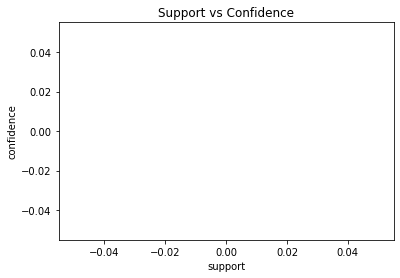

In [23]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

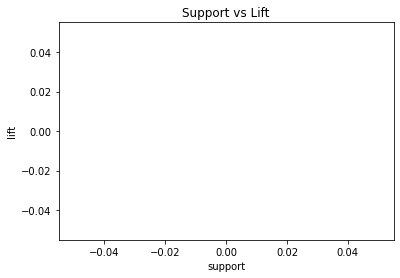

In [24]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

In [51]:
# fit = np.polyfit(rules['lift'], rules['confidence'], 1)
# plt.xlabel('lift')
# plt.ylabel('confidence')
# fit_fn = np.poly1d(fit)
# plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], fit_fn(rules['lift']))

# Homework Assignment # 3

1. Run the entire code below with these two datasets:

```python
T = [['a','b'], ['c','d'], ['a','c'], ['a','b','d'], ['a','e'], ['d'], ['a'], ['b']]
T = [['Bread', 'Milk'], 
     ['Bread', 'Diapers', 'Beer', 'Eggs'], 
     ['Milk', 'Diapers', 'Beer', 'Cola'],
     ['Bread', 'Milk', 'Diapers', 'Beer'],
     ['Bread', 'Milk', 'Diapers', 'Cola']]

```
2. Don't run the congressional vote dataset. It is too large (36 variables)

3. Verify the results of the program manually using the algorithms provided. 

4. Write your report and submit. Use either Jupyter notebook or Word or both.


In [27]:
issues = ['','handicapped-infants','water-project-cost-sharing',
          'adoption-of-the-budget-resolution',
          'physician-fee-freeze',
          'el-salvador-aid',
          'religious-groups-in-schools',
          'anti-satellite-test-ban',
          'aid-to-nicaraguan-contras',
          'mx-missile',
          'immigration',
          'synfuels-corporation-cutback',
          'education-spending',
          'superfund-right-to-sue',
          'crime',
          'duty-free-exports',
          'export-administration-act-south-africa']
len(issues)

17

## Loading congressional votes 1984.

In [28]:
#df = pd.read_csv('../data/house-votes-84.data')

## Making Transaction set from a dataframe

In [29]:
def make_T_from_dataframe(df):
    new_T = []
    for index, row in df.iterrows():
        t = []
        for item in row:
            if len(item) > 0:
                t.append(item)
        new_T.append(t)
    return new_T

In [30]:
# def get_84_congressional_votes(df):
#     new_T = []
#     for index, row in df.iterrows():
#         t = []
#         j = 0
#         for item in row:
#             if item == 'y' or item == 'n':
#                 # t.append(issues[j]+'--'+item)
#                 t.append(f'{j}_{item}')
#             elif item != '?':
#                 t.append(item)
#             j += 1
#         new_T.append(t)
#     return new_T


## Loading a Transaction sets

In [31]:
T = [['a','b'], ['c','d'], ['a','c'], ['a','b','d'], ['a','e'], ['d'], ['a'], ['b']]
T = [['Bread', 'Milk'], 
     ['Bread', 'Diapers', 'Beer', 'Eggs'], 
     ['Milk', 'Diapers', 'Beer', 'Cola'],
     ['Bread', 'Milk', 'Diapers', 'Beer'],
     ['Bread', 'Milk', 'Diapers', 'Cola']]

# df is loading elsewhere above
T = make_T_from_dataframe(df) 

# T = get_84_congressional_votes(df)

sorted_T = []
for t in T:
    t.sort()
    sorted_T.append(t)
T = sorted_T    
list(T)
print(f'There are {len(T)} transactions:')
display(T)

There are 315 transactions:


[['Cheese', 'Diaper', 'Eggs', 'Meat', 'Pencil', 'Wine'],
 ['Cheese', 'Diaper', 'Meat', 'Milk', 'Pencil', 'Wine'],
 ['Eggs', 'Meat', 'Milk', 'Wine'],
 ['Eggs', 'Meat', 'Milk', 'Wine'],
 ['Pencil', 'Wine'],
 ['Bagel', 'Bread', 'Diaper', 'Milk', 'Pencil', 'Wine'],
 ['Cheese', 'Eggs', 'Pencil'],
 ['Bread', 'Diaper', 'Milk', 'Pencil'],
 ['Cheese', 'Diaper', 'Eggs', 'Milk', 'Wine'],
 ['Cheese', 'Diaper', 'Eggs', 'Meat', 'Pencil', 'Wine'],
 ['Eggs', 'Meat', 'Milk', 'Wine'],
 ['Bread', 'Diaper', 'Eggs', 'Meat', 'Milk', 'Wine'],
 ['Bagel', 'Diaper', 'Meat', 'Pencil'],
 ['Cheese', 'Meat', 'Milk'],
 [],
 ['Bagel', 'Diaper'],
 ['Bagel', 'Bread'],
 ['Bagel', 'Milk'],
 [],
 ['Bread', 'Cheese', 'Diaper', 'Eggs', 'Meat'],
 ['Bread', 'Cheese', 'Pencil'],
 ['Bread', 'Eggs', 'Meat', 'Milk', 'Pencil', 'Wine'],
 ['Bagel', 'Cheese', 'Diaper', 'Meat'],
 ['Eggs', 'Meat', 'Pencil', 'Wine'],
 ['Bagel', 'Bread', 'Cheese', 'Meat', 'Milk'],
 [],
 ['Eggs', 'Meat', 'Milk', 'Wine'],
 ['Bread', 'Cheese', 'Meat', 'Milk

In [32]:
# Making Universe set U from transaction set T
def make_U(T):    
    u = {}
    for t in T:
        for i in t:
            u[i] = i
    
    U = list(u)
    U.sort()
    return U

U = make_U(T)

print(f'There are {len(U)} items:')
display(U)

There are 9 items:


['Bagel',
 'Bread',
 'Cheese',
 'Diaper',
 'Eggs',
 'Meat',
 'Milk',
 'Pencil',
 'Wine']

# Brute-force
Printing out a lattice of n items of universe U

In [33]:
"""
Generate all possible k-itemsets for a universe U
Organize the list by row, with row 0 contains null,
row 1 contains all 1-itemsets, row 2 contains all 2-itemsets, etc.
"""
def bf_all_itemsets(U):
    bf_candidates = [[]]
    print(U)
    for c_len in range(1,len(U)+1):
        cs = combinations(U,c_len)
        row = []
        for c in cs:
            c = list(c)
            c.sort()
            row.append(c)

        bf_candidates.append(row)
    return bf_candidates


## Check to see if an item is in an itemset

In [34]:
"""
return whether or not a k_itemset is in a transaction t.
"""
def is_k_itemset_in_transaction(k_itemset, t):
    return all(item in t for item in k_itemset)

## Get all the FI candidates that meet or exceed the support count based on a set of transaction

In [35]:
"""
For a given set of k-itemsets, with at support count against a transaction T,
return a set of frequent k-itemsets.
"""

def get_candidates(sup_count, k_itemsets, T):
    k_itemset_coll = {}
    
    """
    First, we count the occurence of a k-itemset in the set of 
    transaction T.
    """
    for k_itemset in k_itemsets:
        k_itemset_key = '_'.join(k_itemset)
        for t in T:
            if is_k_itemset_in_transaction(k_itemset, t):
                if k_itemset_key in k_itemset_coll:
                    item = k_itemset_coll[k_itemset_key]
                    item[1] += 1
                    k_itemset_coll[k_itemset_key] = item
                else:
                    item = [k_itemset, 1]
                    k_itemset_coll[k_itemset_key] = item           

    """
    Then, we are looking for k-itemsets that is infrequent.
    We keep the keys of the removal k-itemsets in a list
    We then go through the removal list and remove the 
    k-itemsets by key
    """                
    remove_keys = []
    for i in k_itemset_coll:
        item = k_itemset_coll[i]
        if item[1] < sup_count:
            remove_keys.append(i)
    for key in remove_keys:
        del k_itemset_coll[key]
        
    return k_itemset_coll



## Displaying all itemsets

In [36]:
all_itemsets = bf_all_itemsets(U)
# display(all_itemsets)

['Bagel', 'Bread', 'Cheese', 'Diaper', 'Eggs', 'Meat', 'Milk', 'Pencil', 'Wine']


### Displaying the candidates and support count

In [37]:
for sup_count in range(1, len(T)+1):
    
    minsup = sup_count/len(T)
    print(f'\n*** supp_count:{sup_count}, minsup:{minsup}\n')

    candidates = [[]] # Null first entry as in lattice      

    for i in range(1,len(all_itemsets)):
        candidates.append(get_candidates(sup_count, all_itemsets[i], T))

    for i in range(1,len(candidates)):
        print(f'{i}({len(candidates[i])}): {candidates[i]}\n')


*** supp_count:1, minsup:0.0031746031746031746

1(9): {'Bagel': [['Bagel'], 103], 'Bread': [['Bread'], 85], 'Cheese': [['Cheese'], 102], 'Diaper': [['Diaper'], 94], 'Eggs': [['Eggs'], 114], 'Meat': [['Meat'], 118], 'Milk': [['Milk'], 143], 'Pencil': [['Pencil'], 88], 'Wine': [['Wine'], 115]}

2(36): {'Bagel_Bread': [['Bagel', 'Bread'], 34], 'Bagel_Cheese': [['Bagel', 'Cheese'], 35], 'Bagel_Diaper': [['Bagel', 'Diaper'], 32], 'Bagel_Eggs': [['Bagel', 'Eggs'], 20], 'Bagel_Meat': [['Bagel', 'Meat'], 34], 'Bagel_Milk': [['Bagel', 'Milk'], 50], 'Bagel_Pencil': [['Bagel', 'Pencil'], 29], 'Bagel_Wine': [['Bagel', 'Wine'], 37], 'Bread_Cheese': [['Bread', 'Cheese'], 38], 'Bread_Diaper': [['Bread', 'Diaper'], 31], 'Bread_Eggs': [['Bread', 'Eggs'], 25], 'Bread_Meat': [['Bread', 'Meat'], 39], 'Bread_Milk': [['Bread', 'Milk'], 35], 'Bread_Pencil': [['Bread', 'Pencil'], 30], 'Bread_Wine': [['Bread', 'Wine'], 38], 'Cheese_Diaper': [['Cheese', 'Diaper'], 44], 'Cheese_Eggs': [['Cheese', 'Eggs'], 41], 

# Apriori algorithm
Implement Apriori algorithm ...

$F_{k} = {i\ |\ i \in I \land \sigma({i}) \ge N \ x \ minsup}$

## Step 1: Generating `k` itemsets from Universal U

In [38]:
"""
Generating a set of all possible k-itemsets transactions T 
from a set of universal items U
"""
def make_T(a_U, k):
    cs = combinations(a_U, k)
    k_itemsets = []
    for c in cs:
        c = list(c)
        c.sort()
        k_itemsets.append(c)
    return k_itemsets

### Extract items out of a collection of k-itemsets

In [39]:
def get_k_itemsets(ck):
    k_itemsets = []
    for item in ck:
        k_itemsets.append(ck[item][0])
    return k_itemsets

### Prune

In [40]:
"""
Pruning. starting with 2. If k-1 subset of k_candidate 
is not a part of k_minus_1_candidate, drop the k-itemset.
"""
def candidate_prune(kminus1_candidates, k_candidates):
    print('(k-1)-itemsets:')
    display(kminus1_candidates)
    print('k-itemsets:')
    display(k_candidates)
    
    return_k_candidates = []
    
    for i in range(len(k_candidates)):        
        k = len(k_candidates[i])        
        if k == 1:
            print('*** Nothing to prune ***')
            return k_candidates
            
        k_candidate = [k_candidates[i]]
        a_U = make_U(k_candidate)
        kminus1_subsets = make_T(a_U, k-1)
        if all(item in kminus1_candidates for item in kminus1_subsets):
            return_k_candidates.append(k_candidates[i])
            
    return return_k_candidates

### Generating Candidates

In [41]:
"""
Generating all possible k-itemset transactions T
from a previous set of (k-1)-itemsets 
"""
def candidate_gen(kminus1_itemsets, k):  
    return make_T(make_U(kminus1_itemsets), k)

### The apriori algorithm.

In [42]:
"""
"""    
def apriori_gen(U, T, sup_count):    
    UFk = [[]]
    a_U = U
    # display(a_U)
    a_T = make_T(a_U, 1)
    display(a_T)

    prev_ck = a_T
    for k in range (1, 6):
        print(f'*** generating {k}-itemsets ***')
        #k_itemsets = make_T(a_U, k)
        k_itemsets = candidate_gen(prev_ck, k)
        
        print(f'*** pruning {k}-itemsets ***')
        print('** before pruning **')
        display(k_itemsets)
        k_itemsets = candidate_prune(prev_ck, k_itemsets)        
        print('** after pruning **')
        display(k_itemsets)

        print('*** verifying frequent itemsets ***')
        ck = get_candidates(sup_count, k_itemsets, T)
        display(ck)
        # k_itemsets = get_k_itemsets(ck)
        prev_ck = get_k_itemsets(ck)

        if ck == None or len(ck) == 0:
            print ('** DONE **')
            break

        UFk.append(ck)
        k_itemsets = get_k_itemsets(ck)
        a_U = make_U(k_itemsets)
        print('a_U:', a_U)
    return UFk


In [43]:
sup_count = 4
UFk = apriori_gen(U, T, sup_count)

print('*** UFk ***')
display(UFk)

[['Bagel'],
 ['Bread'],
 ['Cheese'],
 ['Diaper'],
 ['Eggs'],
 ['Meat'],
 ['Milk'],
 ['Pencil'],
 ['Wine']]

*** generating 1-itemsets ***
*** pruning 1-itemsets ***
** before pruning **


[['Bagel'],
 ['Bread'],
 ['Cheese'],
 ['Diaper'],
 ['Eggs'],
 ['Meat'],
 ['Milk'],
 ['Pencil'],
 ['Wine']]

(k-1)-itemsets:


[['Bagel'],
 ['Bread'],
 ['Cheese'],
 ['Diaper'],
 ['Eggs'],
 ['Meat'],
 ['Milk'],
 ['Pencil'],
 ['Wine']]

k-itemsets:


[['Bagel'],
 ['Bread'],
 ['Cheese'],
 ['Diaper'],
 ['Eggs'],
 ['Meat'],
 ['Milk'],
 ['Pencil'],
 ['Wine']]

*** Nothing to prune ***
** after pruning **


[['Bagel'],
 ['Bread'],
 ['Cheese'],
 ['Diaper'],
 ['Eggs'],
 ['Meat'],
 ['Milk'],
 ['Pencil'],
 ['Wine']]

*** verifying frequent itemsets ***


{'Bagel': [['Bagel'], 103],
 'Bread': [['Bread'], 85],
 'Cheese': [['Cheese'], 102],
 'Diaper': [['Diaper'], 94],
 'Eggs': [['Eggs'], 114],
 'Meat': [['Meat'], 118],
 'Milk': [['Milk'], 143],
 'Pencil': [['Pencil'], 88],
 'Wine': [['Wine'], 115]}

a_U: ['Bagel', 'Bread', 'Cheese', 'Diaper', 'Eggs', 'Meat', 'Milk', 'Pencil', 'Wine']
*** generating 2-itemsets ***
*** pruning 2-itemsets ***
** before pruning **


[['Bagel', 'Bread'],
 ['Bagel', 'Cheese'],
 ['Bagel', 'Diaper'],
 ['Bagel', 'Eggs'],
 ['Bagel', 'Meat'],
 ['Bagel', 'Milk'],
 ['Bagel', 'Pencil'],
 ['Bagel', 'Wine'],
 ['Bread', 'Cheese'],
 ['Bread', 'Diaper'],
 ['Bread', 'Eggs'],
 ['Bread', 'Meat'],
 ['Bread', 'Milk'],
 ['Bread', 'Pencil'],
 ['Bread', 'Wine'],
 ['Cheese', 'Diaper'],
 ['Cheese', 'Eggs'],
 ['Cheese', 'Meat'],
 ['Cheese', 'Milk'],
 ['Cheese', 'Pencil'],
 ['Cheese', 'Wine'],
 ['Diaper', 'Eggs'],
 ['Diaper', 'Meat'],
 ['Diaper', 'Milk'],
 ['Diaper', 'Pencil'],
 ['Diaper', 'Wine'],
 ['Eggs', 'Meat'],
 ['Eggs', 'Milk'],
 ['Eggs', 'Pencil'],
 ['Eggs', 'Wine'],
 ['Meat', 'Milk'],
 ['Meat', 'Pencil'],
 ['Meat', 'Wine'],
 ['Milk', 'Pencil'],
 ['Milk', 'Wine'],
 ['Pencil', 'Wine']]

(k-1)-itemsets:


[['Bagel'],
 ['Bread'],
 ['Cheese'],
 ['Diaper'],
 ['Eggs'],
 ['Meat'],
 ['Milk'],
 ['Pencil'],
 ['Wine']]

k-itemsets:


[['Bagel', 'Bread'],
 ['Bagel', 'Cheese'],
 ['Bagel', 'Diaper'],
 ['Bagel', 'Eggs'],
 ['Bagel', 'Meat'],
 ['Bagel', 'Milk'],
 ['Bagel', 'Pencil'],
 ['Bagel', 'Wine'],
 ['Bread', 'Cheese'],
 ['Bread', 'Diaper'],
 ['Bread', 'Eggs'],
 ['Bread', 'Meat'],
 ['Bread', 'Milk'],
 ['Bread', 'Pencil'],
 ['Bread', 'Wine'],
 ['Cheese', 'Diaper'],
 ['Cheese', 'Eggs'],
 ['Cheese', 'Meat'],
 ['Cheese', 'Milk'],
 ['Cheese', 'Pencil'],
 ['Cheese', 'Wine'],
 ['Diaper', 'Eggs'],
 ['Diaper', 'Meat'],
 ['Diaper', 'Milk'],
 ['Diaper', 'Pencil'],
 ['Diaper', 'Wine'],
 ['Eggs', 'Meat'],
 ['Eggs', 'Milk'],
 ['Eggs', 'Pencil'],
 ['Eggs', 'Wine'],
 ['Meat', 'Milk'],
 ['Meat', 'Pencil'],
 ['Meat', 'Wine'],
 ['Milk', 'Pencil'],
 ['Milk', 'Wine'],
 ['Pencil', 'Wine']]

** after pruning **


[['Bagel', 'Bread'],
 ['Bagel', 'Cheese'],
 ['Bagel', 'Diaper'],
 ['Bagel', 'Eggs'],
 ['Bagel', 'Meat'],
 ['Bagel', 'Milk'],
 ['Bagel', 'Pencil'],
 ['Bagel', 'Wine'],
 ['Bread', 'Cheese'],
 ['Bread', 'Diaper'],
 ['Bread', 'Eggs'],
 ['Bread', 'Meat'],
 ['Bread', 'Milk'],
 ['Bread', 'Pencil'],
 ['Bread', 'Wine'],
 ['Cheese', 'Diaper'],
 ['Cheese', 'Eggs'],
 ['Cheese', 'Meat'],
 ['Cheese', 'Milk'],
 ['Cheese', 'Pencil'],
 ['Cheese', 'Wine'],
 ['Diaper', 'Eggs'],
 ['Diaper', 'Meat'],
 ['Diaper', 'Milk'],
 ['Diaper', 'Pencil'],
 ['Diaper', 'Wine'],
 ['Eggs', 'Meat'],
 ['Eggs', 'Milk'],
 ['Eggs', 'Pencil'],
 ['Eggs', 'Wine'],
 ['Meat', 'Milk'],
 ['Meat', 'Pencil'],
 ['Meat', 'Wine'],
 ['Milk', 'Pencil'],
 ['Milk', 'Wine'],
 ['Pencil', 'Wine']]

*** verifying frequent itemsets ***


{'Bagel_Bread': [['Bagel', 'Bread'], 34],
 'Bagel_Cheese': [['Bagel', 'Cheese'], 35],
 'Bagel_Diaper': [['Bagel', 'Diaper'], 32],
 'Bagel_Eggs': [['Bagel', 'Eggs'], 20],
 'Bagel_Meat': [['Bagel', 'Meat'], 34],
 'Bagel_Milk': [['Bagel', 'Milk'], 50],
 'Bagel_Pencil': [['Bagel', 'Pencil'], 29],
 'Bagel_Wine': [['Bagel', 'Wine'], 37],
 'Bread_Cheese': [['Bread', 'Cheese'], 38],
 'Bread_Diaper': [['Bread', 'Diaper'], 31],
 'Bread_Eggs': [['Bread', 'Eggs'], 25],
 'Bread_Meat': [['Bread', 'Meat'], 39],
 'Bread_Milk': [['Bread', 'Milk'], 35],
 'Bread_Pencil': [['Bread', 'Pencil'], 30],
 'Bread_Wine': [['Bread', 'Wine'], 38],
 'Cheese_Diaper': [['Cheese', 'Diaper'], 44],
 'Cheese_Eggs': [['Cheese', 'Eggs'], 41],
 'Cheese_Meat': [['Cheese', 'Meat'], 42],
 'Cheese_Milk': [['Cheese', 'Milk'], 45],
 'Cheese_Pencil': [['Cheese', 'Pencil'], 46],
 'Cheese_Wine': [['Cheese', 'Wine'], 46],
 'Diaper_Eggs': [['Diaper', 'Eggs'], 37],
 'Diaper_Meat': [['Diaper', 'Meat'], 36],
 'Diaper_Milk': [['Diaper', 'M

a_U: ['Bagel', 'Bread', 'Cheese', 'Diaper', 'Eggs', 'Meat', 'Milk', 'Pencil', 'Wine']
*** generating 3-itemsets ***
*** pruning 3-itemsets ***
** before pruning **


[['Bagel', 'Bread', 'Cheese'],
 ['Bagel', 'Bread', 'Diaper'],
 ['Bagel', 'Bread', 'Eggs'],
 ['Bagel', 'Bread', 'Meat'],
 ['Bagel', 'Bread', 'Milk'],
 ['Bagel', 'Bread', 'Pencil'],
 ['Bagel', 'Bread', 'Wine'],
 ['Bagel', 'Cheese', 'Diaper'],
 ['Bagel', 'Cheese', 'Eggs'],
 ['Bagel', 'Cheese', 'Meat'],
 ['Bagel', 'Cheese', 'Milk'],
 ['Bagel', 'Cheese', 'Pencil'],
 ['Bagel', 'Cheese', 'Wine'],
 ['Bagel', 'Diaper', 'Eggs'],
 ['Bagel', 'Diaper', 'Meat'],
 ['Bagel', 'Diaper', 'Milk'],
 ['Bagel', 'Diaper', 'Pencil'],
 ['Bagel', 'Diaper', 'Wine'],
 ['Bagel', 'Eggs', 'Meat'],
 ['Bagel', 'Eggs', 'Milk'],
 ['Bagel', 'Eggs', 'Pencil'],
 ['Bagel', 'Eggs', 'Wine'],
 ['Bagel', 'Meat', 'Milk'],
 ['Bagel', 'Meat', 'Pencil'],
 ['Bagel', 'Meat', 'Wine'],
 ['Bagel', 'Milk', 'Pencil'],
 ['Bagel', 'Milk', 'Wine'],
 ['Bagel', 'Pencil', 'Wine'],
 ['Bread', 'Cheese', 'Diaper'],
 ['Bread', 'Cheese', 'Eggs'],
 ['Bread', 'Cheese', 'Meat'],
 ['Bread', 'Cheese', 'Milk'],
 ['Bread', 'Cheese', 'Pencil'],
 ['Bread', 'C

(k-1)-itemsets:


[['Bagel', 'Bread'],
 ['Bagel', 'Cheese'],
 ['Bagel', 'Diaper'],
 ['Bagel', 'Eggs'],
 ['Bagel', 'Meat'],
 ['Bagel', 'Milk'],
 ['Bagel', 'Pencil'],
 ['Bagel', 'Wine'],
 ['Bread', 'Cheese'],
 ['Bread', 'Diaper'],
 ['Bread', 'Eggs'],
 ['Bread', 'Meat'],
 ['Bread', 'Milk'],
 ['Bread', 'Pencil'],
 ['Bread', 'Wine'],
 ['Cheese', 'Diaper'],
 ['Cheese', 'Eggs'],
 ['Cheese', 'Meat'],
 ['Cheese', 'Milk'],
 ['Cheese', 'Pencil'],
 ['Cheese', 'Wine'],
 ['Diaper', 'Eggs'],
 ['Diaper', 'Meat'],
 ['Diaper', 'Milk'],
 ['Diaper', 'Pencil'],
 ['Diaper', 'Wine'],
 ['Eggs', 'Meat'],
 ['Eggs', 'Milk'],
 ['Eggs', 'Pencil'],
 ['Eggs', 'Wine'],
 ['Meat', 'Milk'],
 ['Meat', 'Pencil'],
 ['Meat', 'Wine'],
 ['Milk', 'Pencil'],
 ['Milk', 'Wine'],
 ['Pencil', 'Wine']]

k-itemsets:


[['Bagel', 'Bread', 'Cheese'],
 ['Bagel', 'Bread', 'Diaper'],
 ['Bagel', 'Bread', 'Eggs'],
 ['Bagel', 'Bread', 'Meat'],
 ['Bagel', 'Bread', 'Milk'],
 ['Bagel', 'Bread', 'Pencil'],
 ['Bagel', 'Bread', 'Wine'],
 ['Bagel', 'Cheese', 'Diaper'],
 ['Bagel', 'Cheese', 'Eggs'],
 ['Bagel', 'Cheese', 'Meat'],
 ['Bagel', 'Cheese', 'Milk'],
 ['Bagel', 'Cheese', 'Pencil'],
 ['Bagel', 'Cheese', 'Wine'],
 ['Bagel', 'Diaper', 'Eggs'],
 ['Bagel', 'Diaper', 'Meat'],
 ['Bagel', 'Diaper', 'Milk'],
 ['Bagel', 'Diaper', 'Pencil'],
 ['Bagel', 'Diaper', 'Wine'],
 ['Bagel', 'Eggs', 'Meat'],
 ['Bagel', 'Eggs', 'Milk'],
 ['Bagel', 'Eggs', 'Pencil'],
 ['Bagel', 'Eggs', 'Wine'],
 ['Bagel', 'Meat', 'Milk'],
 ['Bagel', 'Meat', 'Pencil'],
 ['Bagel', 'Meat', 'Wine'],
 ['Bagel', 'Milk', 'Pencil'],
 ['Bagel', 'Milk', 'Wine'],
 ['Bagel', 'Pencil', 'Wine'],
 ['Bread', 'Cheese', 'Diaper'],
 ['Bread', 'Cheese', 'Eggs'],
 ['Bread', 'Cheese', 'Meat'],
 ['Bread', 'Cheese', 'Milk'],
 ['Bread', 'Cheese', 'Pencil'],
 ['Bread', 'C

** after pruning **


[['Bagel', 'Bread', 'Cheese'],
 ['Bagel', 'Bread', 'Diaper'],
 ['Bagel', 'Bread', 'Eggs'],
 ['Bagel', 'Bread', 'Meat'],
 ['Bagel', 'Bread', 'Milk'],
 ['Bagel', 'Bread', 'Pencil'],
 ['Bagel', 'Bread', 'Wine'],
 ['Bagel', 'Cheese', 'Diaper'],
 ['Bagel', 'Cheese', 'Eggs'],
 ['Bagel', 'Cheese', 'Meat'],
 ['Bagel', 'Cheese', 'Milk'],
 ['Bagel', 'Cheese', 'Pencil'],
 ['Bagel', 'Cheese', 'Wine'],
 ['Bagel', 'Diaper', 'Eggs'],
 ['Bagel', 'Diaper', 'Meat'],
 ['Bagel', 'Diaper', 'Milk'],
 ['Bagel', 'Diaper', 'Pencil'],
 ['Bagel', 'Diaper', 'Wine'],
 ['Bagel', 'Eggs', 'Meat'],
 ['Bagel', 'Eggs', 'Milk'],
 ['Bagel', 'Eggs', 'Pencil'],
 ['Bagel', 'Eggs', 'Wine'],
 ['Bagel', 'Meat', 'Milk'],
 ['Bagel', 'Meat', 'Pencil'],
 ['Bagel', 'Meat', 'Wine'],
 ['Bagel', 'Milk', 'Pencil'],
 ['Bagel', 'Milk', 'Wine'],
 ['Bagel', 'Pencil', 'Wine'],
 ['Bread', 'Cheese', 'Diaper'],
 ['Bread', 'Cheese', 'Eggs'],
 ['Bread', 'Cheese', 'Meat'],
 ['Bread', 'Cheese', 'Milk'],
 ['Bread', 'Cheese', 'Pencil'],
 ['Bread', 'C

*** verifying frequent itemsets ***


{'Bagel_Bread_Cheese': [['Bagel', 'Bread', 'Cheese'], 17],
 'Bagel_Bread_Diaper': [['Bagel', 'Bread', 'Diaper'], 12],
 'Bagel_Bread_Eggs': [['Bagel', 'Bread', 'Eggs'], 4],
 'Bagel_Bread_Meat': [['Bagel', 'Bread', 'Meat'], 17],
 'Bagel_Bread_Milk': [['Bagel', 'Bread', 'Milk'], 11],
 'Bagel_Bread_Pencil': [['Bagel', 'Bread', 'Pencil'], 11],
 'Bagel_Bread_Wine': [['Bagel', 'Bread', 'Wine'], 18],
 'Bagel_Cheese_Diaper': [['Bagel', 'Cheese', 'Diaper'], 14],
 'Bagel_Cheese_Eggs': [['Bagel', 'Cheese', 'Eggs'], 9],
 'Bagel_Cheese_Meat': [['Bagel', 'Cheese', 'Meat'], 18],
 'Bagel_Cheese_Milk': [['Bagel', 'Cheese', 'Milk'], 13],
 'Bagel_Cheese_Pencil': [['Bagel', 'Cheese', 'Pencil'], 16],
 'Bagel_Cheese_Wine': [['Bagel', 'Cheese', 'Wine'], 20],
 'Bagel_Diaper_Eggs': [['Bagel', 'Diaper', 'Eggs'], 8],
 'Bagel_Diaper_Meat': [['Bagel', 'Diaper', 'Meat'], 15],
 'Bagel_Diaper_Milk': [['Bagel', 'Diaper', 'Milk'], 11],
 'Bagel_Diaper_Pencil': [['Bagel', 'Diaper', 'Pencil'], 12],
 'Bagel_Diaper_Wine': [[

a_U: ['Bagel', 'Bread', 'Cheese', 'Diaper', 'Eggs', 'Meat', 'Milk', 'Pencil', 'Wine']
*** generating 4-itemsets ***
*** pruning 4-itemsets ***
** before pruning **


[['Bagel', 'Bread', 'Cheese', 'Diaper'],
 ['Bagel', 'Bread', 'Cheese', 'Eggs'],
 ['Bagel', 'Bread', 'Cheese', 'Meat'],
 ['Bagel', 'Bread', 'Cheese', 'Milk'],
 ['Bagel', 'Bread', 'Cheese', 'Pencil'],
 ['Bagel', 'Bread', 'Cheese', 'Wine'],
 ['Bagel', 'Bread', 'Diaper', 'Eggs'],
 ['Bagel', 'Bread', 'Diaper', 'Meat'],
 ['Bagel', 'Bread', 'Diaper', 'Milk'],
 ['Bagel', 'Bread', 'Diaper', 'Pencil'],
 ['Bagel', 'Bread', 'Diaper', 'Wine'],
 ['Bagel', 'Bread', 'Eggs', 'Meat'],
 ['Bagel', 'Bread', 'Eggs', 'Milk'],
 ['Bagel', 'Bread', 'Eggs', 'Pencil'],
 ['Bagel', 'Bread', 'Eggs', 'Wine'],
 ['Bagel', 'Bread', 'Meat', 'Milk'],
 ['Bagel', 'Bread', 'Meat', 'Pencil'],
 ['Bagel', 'Bread', 'Meat', 'Wine'],
 ['Bagel', 'Bread', 'Milk', 'Pencil'],
 ['Bagel', 'Bread', 'Milk', 'Wine'],
 ['Bagel', 'Bread', 'Pencil', 'Wine'],
 ['Bagel', 'Cheese', 'Diaper', 'Eggs'],
 ['Bagel', 'Cheese', 'Diaper', 'Meat'],
 ['Bagel', 'Cheese', 'Diaper', 'Milk'],
 ['Bagel', 'Cheese', 'Diaper', 'Pencil'],
 ['Bagel', 'Cheese', 'Dia

(k-1)-itemsets:


[['Bagel', 'Bread', 'Cheese'],
 ['Bagel', 'Bread', 'Diaper'],
 ['Bagel', 'Bread', 'Eggs'],
 ['Bagel', 'Bread', 'Meat'],
 ['Bagel', 'Bread', 'Milk'],
 ['Bagel', 'Bread', 'Pencil'],
 ['Bagel', 'Bread', 'Wine'],
 ['Bagel', 'Cheese', 'Diaper'],
 ['Bagel', 'Cheese', 'Eggs'],
 ['Bagel', 'Cheese', 'Meat'],
 ['Bagel', 'Cheese', 'Milk'],
 ['Bagel', 'Cheese', 'Pencil'],
 ['Bagel', 'Cheese', 'Wine'],
 ['Bagel', 'Diaper', 'Eggs'],
 ['Bagel', 'Diaper', 'Meat'],
 ['Bagel', 'Diaper', 'Milk'],
 ['Bagel', 'Diaper', 'Pencil'],
 ['Bagel', 'Diaper', 'Wine'],
 ['Bagel', 'Eggs', 'Meat'],
 ['Bagel', 'Eggs', 'Milk'],
 ['Bagel', 'Eggs', 'Pencil'],
 ['Bagel', 'Eggs', 'Wine'],
 ['Bagel', 'Meat', 'Milk'],
 ['Bagel', 'Meat', 'Pencil'],
 ['Bagel', 'Meat', 'Wine'],
 ['Bagel', 'Milk', 'Pencil'],
 ['Bagel', 'Milk', 'Wine'],
 ['Bagel', 'Pencil', 'Wine'],
 ['Bread', 'Cheese', 'Diaper'],
 ['Bread', 'Cheese', 'Eggs'],
 ['Bread', 'Cheese', 'Meat'],
 ['Bread', 'Cheese', 'Milk'],
 ['Bread', 'Cheese', 'Pencil'],
 ['Bread', 'C

k-itemsets:


[['Bagel', 'Bread', 'Cheese', 'Diaper'],
 ['Bagel', 'Bread', 'Cheese', 'Eggs'],
 ['Bagel', 'Bread', 'Cheese', 'Meat'],
 ['Bagel', 'Bread', 'Cheese', 'Milk'],
 ['Bagel', 'Bread', 'Cheese', 'Pencil'],
 ['Bagel', 'Bread', 'Cheese', 'Wine'],
 ['Bagel', 'Bread', 'Diaper', 'Eggs'],
 ['Bagel', 'Bread', 'Diaper', 'Meat'],
 ['Bagel', 'Bread', 'Diaper', 'Milk'],
 ['Bagel', 'Bread', 'Diaper', 'Pencil'],
 ['Bagel', 'Bread', 'Diaper', 'Wine'],
 ['Bagel', 'Bread', 'Eggs', 'Meat'],
 ['Bagel', 'Bread', 'Eggs', 'Milk'],
 ['Bagel', 'Bread', 'Eggs', 'Pencil'],
 ['Bagel', 'Bread', 'Eggs', 'Wine'],
 ['Bagel', 'Bread', 'Meat', 'Milk'],
 ['Bagel', 'Bread', 'Meat', 'Pencil'],
 ['Bagel', 'Bread', 'Meat', 'Wine'],
 ['Bagel', 'Bread', 'Milk', 'Pencil'],
 ['Bagel', 'Bread', 'Milk', 'Wine'],
 ['Bagel', 'Bread', 'Pencil', 'Wine'],
 ['Bagel', 'Cheese', 'Diaper', 'Eggs'],
 ['Bagel', 'Cheese', 'Diaper', 'Meat'],
 ['Bagel', 'Cheese', 'Diaper', 'Milk'],
 ['Bagel', 'Cheese', 'Diaper', 'Pencil'],
 ['Bagel', 'Cheese', 'Dia

** after pruning **


[['Bagel', 'Bread', 'Cheese', 'Diaper'],
 ['Bagel', 'Bread', 'Cheese', 'Eggs'],
 ['Bagel', 'Bread', 'Cheese', 'Meat'],
 ['Bagel', 'Bread', 'Cheese', 'Milk'],
 ['Bagel', 'Bread', 'Cheese', 'Pencil'],
 ['Bagel', 'Bread', 'Cheese', 'Wine'],
 ['Bagel', 'Bread', 'Diaper', 'Eggs'],
 ['Bagel', 'Bread', 'Diaper', 'Meat'],
 ['Bagel', 'Bread', 'Diaper', 'Milk'],
 ['Bagel', 'Bread', 'Diaper', 'Pencil'],
 ['Bagel', 'Bread', 'Diaper', 'Wine'],
 ['Bagel', 'Bread', 'Eggs', 'Meat'],
 ['Bagel', 'Bread', 'Eggs', 'Milk'],
 ['Bagel', 'Bread', 'Eggs', 'Pencil'],
 ['Bagel', 'Bread', 'Eggs', 'Wine'],
 ['Bagel', 'Bread', 'Meat', 'Milk'],
 ['Bagel', 'Bread', 'Meat', 'Pencil'],
 ['Bagel', 'Bread', 'Meat', 'Wine'],
 ['Bagel', 'Bread', 'Milk', 'Pencil'],
 ['Bagel', 'Bread', 'Milk', 'Wine'],
 ['Bagel', 'Bread', 'Pencil', 'Wine'],
 ['Bagel', 'Cheese', 'Diaper', 'Eggs'],
 ['Bagel', 'Cheese', 'Diaper', 'Meat'],
 ['Bagel', 'Cheese', 'Diaper', 'Milk'],
 ['Bagel', 'Cheese', 'Diaper', 'Pencil'],
 ['Bagel', 'Cheese', 'Dia

*** verifying frequent itemsets ***


{'Bagel_Bread_Cheese_Diaper': [['Bagel', 'Bread', 'Cheese', 'Diaper'], 4],
 'Bagel_Bread_Cheese_Meat': [['Bagel', 'Bread', 'Cheese', 'Meat'], 11],
 'Bagel_Bread_Cheese_Milk': [['Bagel', 'Bread', 'Cheese', 'Milk'], 7],
 'Bagel_Bread_Cheese_Pencil': [['Bagel', 'Bread', 'Cheese', 'Pencil'], 9],
 'Bagel_Bread_Cheese_Wine': [['Bagel', 'Bread', 'Cheese', 'Wine'], 9],
 'Bagel_Bread_Diaper_Meat': [['Bagel', 'Bread', 'Diaper', 'Meat'], 6],
 'Bagel_Bread_Diaper_Milk': [['Bagel', 'Bread', 'Diaper', 'Milk'], 4],
 'Bagel_Bread_Diaper_Pencil': [['Bagel', 'Bread', 'Diaper', 'Pencil'], 4],
 'Bagel_Bread_Diaper_Wine': [['Bagel', 'Bread', 'Diaper', 'Wine'], 7],
 'Bagel_Bread_Eggs_Wine': [['Bagel', 'Bread', 'Eggs', 'Wine'], 4],
 'Bagel_Bread_Meat_Pencil': [['Bagel', 'Bread', 'Meat', 'Pencil'], 7],
 'Bagel_Bread_Meat_Wine': [['Bagel', 'Bread', 'Meat', 'Wine'], 9],
 'Bagel_Bread_Milk_Pencil': [['Bagel', 'Bread', 'Milk', 'Pencil'], 5],
 'Bagel_Bread_Milk_Wine': [['Bagel', 'Bread', 'Milk', 'Wine'], 5],
 'Bag

a_U: ['Bagel', 'Bread', 'Cheese', 'Diaper', 'Eggs', 'Meat', 'Milk', 'Pencil', 'Wine']
*** generating 5-itemsets ***
*** pruning 5-itemsets ***
** before pruning **


[['Bagel', 'Bread', 'Cheese', 'Diaper', 'Eggs'],
 ['Bagel', 'Bread', 'Cheese', 'Diaper', 'Meat'],
 ['Bagel', 'Bread', 'Cheese', 'Diaper', 'Milk'],
 ['Bagel', 'Bread', 'Cheese', 'Diaper', 'Pencil'],
 ['Bagel', 'Bread', 'Cheese', 'Diaper', 'Wine'],
 ['Bagel', 'Bread', 'Cheese', 'Eggs', 'Meat'],
 ['Bagel', 'Bread', 'Cheese', 'Eggs', 'Milk'],
 ['Bagel', 'Bread', 'Cheese', 'Eggs', 'Pencil'],
 ['Bagel', 'Bread', 'Cheese', 'Eggs', 'Wine'],
 ['Bagel', 'Bread', 'Cheese', 'Meat', 'Milk'],
 ['Bagel', 'Bread', 'Cheese', 'Meat', 'Pencil'],
 ['Bagel', 'Bread', 'Cheese', 'Meat', 'Wine'],
 ['Bagel', 'Bread', 'Cheese', 'Milk', 'Pencil'],
 ['Bagel', 'Bread', 'Cheese', 'Milk', 'Wine'],
 ['Bagel', 'Bread', 'Cheese', 'Pencil', 'Wine'],
 ['Bagel', 'Bread', 'Diaper', 'Eggs', 'Meat'],
 ['Bagel', 'Bread', 'Diaper', 'Eggs', 'Milk'],
 ['Bagel', 'Bread', 'Diaper', 'Eggs', 'Pencil'],
 ['Bagel', 'Bread', 'Diaper', 'Eggs', 'Wine'],
 ['Bagel', 'Bread', 'Diaper', 'Meat', 'Milk'],
 ['Bagel', 'Bread', 'Diaper', 'Meat', 

(k-1)-itemsets:


[['Bagel', 'Bread', 'Cheese', 'Diaper'],
 ['Bagel', 'Bread', 'Cheese', 'Meat'],
 ['Bagel', 'Bread', 'Cheese', 'Milk'],
 ['Bagel', 'Bread', 'Cheese', 'Pencil'],
 ['Bagel', 'Bread', 'Cheese', 'Wine'],
 ['Bagel', 'Bread', 'Diaper', 'Meat'],
 ['Bagel', 'Bread', 'Diaper', 'Milk'],
 ['Bagel', 'Bread', 'Diaper', 'Pencil'],
 ['Bagel', 'Bread', 'Diaper', 'Wine'],
 ['Bagel', 'Bread', 'Eggs', 'Wine'],
 ['Bagel', 'Bread', 'Meat', 'Pencil'],
 ['Bagel', 'Bread', 'Meat', 'Wine'],
 ['Bagel', 'Bread', 'Milk', 'Pencil'],
 ['Bagel', 'Bread', 'Milk', 'Wine'],
 ['Bagel', 'Bread', 'Pencil', 'Wine'],
 ['Bagel', 'Cheese', 'Diaper', 'Meat'],
 ['Bagel', 'Cheese', 'Diaper', 'Milk'],
 ['Bagel', 'Cheese', 'Diaper', 'Pencil'],
 ['Bagel', 'Cheese', 'Diaper', 'Wine'],
 ['Bagel', 'Cheese', 'Eggs', 'Wine'],
 ['Bagel', 'Cheese', 'Meat', 'Milk'],
 ['Bagel', 'Cheese', 'Meat', 'Pencil'],
 ['Bagel', 'Cheese', 'Meat', 'Wine'],
 ['Bagel', 'Cheese', 'Milk', 'Wine'],
 ['Bagel', 'Cheese', 'Pencil', 'Wine'],
 ['Bagel', 'Diaper', 

k-itemsets:


[['Bagel', 'Bread', 'Cheese', 'Diaper', 'Eggs'],
 ['Bagel', 'Bread', 'Cheese', 'Diaper', 'Meat'],
 ['Bagel', 'Bread', 'Cheese', 'Diaper', 'Milk'],
 ['Bagel', 'Bread', 'Cheese', 'Diaper', 'Pencil'],
 ['Bagel', 'Bread', 'Cheese', 'Diaper', 'Wine'],
 ['Bagel', 'Bread', 'Cheese', 'Eggs', 'Meat'],
 ['Bagel', 'Bread', 'Cheese', 'Eggs', 'Milk'],
 ['Bagel', 'Bread', 'Cheese', 'Eggs', 'Pencil'],
 ['Bagel', 'Bread', 'Cheese', 'Eggs', 'Wine'],
 ['Bagel', 'Bread', 'Cheese', 'Meat', 'Milk'],
 ['Bagel', 'Bread', 'Cheese', 'Meat', 'Pencil'],
 ['Bagel', 'Bread', 'Cheese', 'Meat', 'Wine'],
 ['Bagel', 'Bread', 'Cheese', 'Milk', 'Pencil'],
 ['Bagel', 'Bread', 'Cheese', 'Milk', 'Wine'],
 ['Bagel', 'Bread', 'Cheese', 'Pencil', 'Wine'],
 ['Bagel', 'Bread', 'Diaper', 'Eggs', 'Meat'],
 ['Bagel', 'Bread', 'Diaper', 'Eggs', 'Milk'],
 ['Bagel', 'Bread', 'Diaper', 'Eggs', 'Pencil'],
 ['Bagel', 'Bread', 'Diaper', 'Eggs', 'Wine'],
 ['Bagel', 'Bread', 'Diaper', 'Meat', 'Milk'],
 ['Bagel', 'Bread', 'Diaper', 'Meat', 

** after pruning **


[['Bagel', 'Bread', 'Cheese', 'Diaper', 'Meat'],
 ['Bagel', 'Bread', 'Cheese', 'Meat', 'Pencil'],
 ['Bagel', 'Bread', 'Cheese', 'Meat', 'Wine'],
 ['Bagel', 'Bread', 'Cheese', 'Milk', 'Wine'],
 ['Bagel', 'Bread', 'Cheese', 'Pencil', 'Wine'],
 ['Bagel', 'Bread', 'Diaper', 'Meat', 'Wine'],
 ['Bagel', 'Bread', 'Diaper', 'Milk', 'Wine'],
 ['Bagel', 'Bread', 'Meat', 'Pencil', 'Wine'],
 ['Bagel', 'Bread', 'Milk', 'Pencil', 'Wine'],
 ['Bagel', 'Cheese', 'Diaper', 'Meat', 'Pencil'],
 ['Bagel', 'Cheese', 'Diaper', 'Meat', 'Wine'],
 ['Bagel', 'Cheese', 'Diaper', 'Milk', 'Wine'],
 ['Bagel', 'Cheese', 'Diaper', 'Pencil', 'Wine'],
 ['Bagel', 'Cheese', 'Meat', 'Milk', 'Wine'],
 ['Bagel', 'Cheese', 'Meat', 'Pencil', 'Wine'],
 ['Bagel', 'Diaper', 'Eggs', 'Meat', 'Pencil'],
 ['Bagel', 'Diaper', 'Eggs', 'Meat', 'Wine'],
 ['Bagel', 'Diaper', 'Eggs', 'Pencil', 'Wine'],
 ['Bagel', 'Diaper', 'Meat', 'Milk', 'Wine'],
 ['Bagel', 'Diaper', 'Meat', 'Pencil', 'Wine'],
 ['Bagel', 'Eggs', 'Meat', 'Milk', 'Wine'],
 

*** verifying frequent itemsets ***


{'Bagel_Bread_Cheese_Diaper_Meat': [['Bagel',
   'Bread',
   'Cheese',
   'Diaper',
   'Meat'],
  4],
 'Bagel_Bread_Cheese_Meat_Pencil': [['Bagel',
   'Bread',
   'Cheese',
   'Meat',
   'Pencil'],
  6],
 'Bagel_Bread_Cheese_Meat_Wine': [['Bagel', 'Bread', 'Cheese', 'Meat', 'Wine'],
  4],
 'Bagel_Bread_Cheese_Milk_Wine': [['Bagel', 'Bread', 'Cheese', 'Milk', 'Wine'],
  4],
 'Bagel_Bread_Cheese_Pencil_Wine': [['Bagel',
   'Bread',
   'Cheese',
   'Pencil',
   'Wine'],
  4],
 'Bagel_Cheese_Diaper_Meat_Wine': [['Bagel',
   'Cheese',
   'Diaper',
   'Meat',
   'Wine'],
  4],
 'Bagel_Cheese_Diaper_Milk_Wine': [['Bagel',
   'Cheese',
   'Diaper',
   'Milk',
   'Wine'],
  4],
 'Bagel_Cheese_Meat_Milk_Wine': [['Bagel', 'Cheese', 'Meat', 'Milk', 'Wine'],
  4],
 'Bagel_Diaper_Eggs_Pencil_Wine': [['Bagel',
   'Diaper',
   'Eggs',
   'Pencil',
   'Wine'],
  4],
 'Bagel_Eggs_Meat_Pencil_Wine': [['Bagel', 'Eggs', 'Meat', 'Pencil', 'Wine'],
  4],
 'Bread_Cheese_Meat_Pencil_Wine': [['Bread',
   'Chees

a_U: ['Bagel', 'Bread', 'Cheese', 'Diaper', 'Eggs', 'Meat', 'Milk', 'Pencil', 'Wine']
*** UFk ***


[[],
 {'Bagel': [['Bagel'], 103],
  'Bread': [['Bread'], 85],
  'Cheese': [['Cheese'], 102],
  'Diaper': [['Diaper'], 94],
  'Eggs': [['Eggs'], 114],
  'Meat': [['Meat'], 118],
  'Milk': [['Milk'], 143],
  'Pencil': [['Pencil'], 88],
  'Wine': [['Wine'], 115]},
 {'Bagel_Bread': [['Bagel', 'Bread'], 34],
  'Bagel_Cheese': [['Bagel', 'Cheese'], 35],
  'Bagel_Diaper': [['Bagel', 'Diaper'], 32],
  'Bagel_Eggs': [['Bagel', 'Eggs'], 20],
  'Bagel_Meat': [['Bagel', 'Meat'], 34],
  'Bagel_Milk': [['Bagel', 'Milk'], 50],
  'Bagel_Pencil': [['Bagel', 'Pencil'], 29],
  'Bagel_Wine': [['Bagel', 'Wine'], 37],
  'Bread_Cheese': [['Bread', 'Cheese'], 38],
  'Bread_Diaper': [['Bread', 'Diaper'], 31],
  'Bread_Eggs': [['Bread', 'Eggs'], 25],
  'Bread_Meat': [['Bread', 'Meat'], 39],
  'Bread_Milk': [['Bread', 'Milk'], 35],
  'Bread_Pencil': [['Bread', 'Pencil'], 30],
  'Bread_Wine': [['Bread', 'Wine'], 38],
  'Cheese_Diaper': [['Cheese', 'Diaper'], 44],
  'Cheese_Eggs': [['Cheese', 'Eggs'], 41],
  'Chee

In [44]:
# Computing Confidence
# for each frequent k-itemset fk, k >= 2 do
#   H1 = 1
# end for

for k in range(1, len(UFk)):
    for key in UFk[k]:
        k_itemset = UFk[k][key][0]
        k_count = UFk[k][key][1]
        print(key, k_itemset, k_count)
        h1 = []
        for item in k_itemset:
            h1.append([item])
        print(h1)


        

Bagel ['Bagel'] 103
[['Bagel']]
Bread ['Bread'] 85
[['Bread']]
Cheese ['Cheese'] 102
[['Cheese']]
Diaper ['Diaper'] 94
[['Diaper']]
Eggs ['Eggs'] 114
[['Eggs']]
Meat ['Meat'] 118
[['Meat']]
Milk ['Milk'] 143
[['Milk']]
Pencil ['Pencil'] 88
[['Pencil']]
Wine ['Wine'] 115
[['Wine']]
Bagel_Bread ['Bagel', 'Bread'] 34
[['Bagel'], ['Bread']]
Bagel_Cheese ['Bagel', 'Cheese'] 35
[['Bagel'], ['Cheese']]
Bagel_Diaper ['Bagel', 'Diaper'] 32
[['Bagel'], ['Diaper']]
Bagel_Eggs ['Bagel', 'Eggs'] 20
[['Bagel'], ['Eggs']]
Bagel_Meat ['Bagel', 'Meat'] 34
[['Bagel'], ['Meat']]
Bagel_Milk ['Bagel', 'Milk'] 50
[['Bagel'], ['Milk']]
Bagel_Pencil ['Bagel', 'Pencil'] 29
[['Bagel'], ['Pencil']]
Bagel_Wine ['Bagel', 'Wine'] 37
[['Bagel'], ['Wine']]
Bread_Cheese ['Bread', 'Cheese'] 38
[['Bread'], ['Cheese']]
Bread_Diaper ['Bread', 'Diaper'] 31
[['Bread'], ['Diaper']]
Bread_Eggs ['Bread', 'Eggs'] 25
[['Bread'], ['Eggs']]
Bread_Meat ['Bread', 'Meat'] 39
[['Bread'], ['Meat']]
Bread_Milk ['Bread', 'Milk'] 35
[['Br

In [45]:
# itemset = ['a','b','c']
all_rules = {}
for k in range(2, len(UFk)):
    for key in UFk[k]:
        k_itemset = UFk[k][key][0]
        k_count = UFk[k][key][1]
        print('\n\n***', key, k_itemset, k_count)
        h1 = []

        super_set = []
        for count in range(1,len(k_itemset)):
            for c in combinations(k_itemset, count):
                value_key = '_'.join(c)
                print(key, value_key, c, UFk[len(c)][value_key][1])
                super_set.append(c)
        
        sig_a_b = k_count
        all_rules = {}
        for i in range(len(super_set)-1):
            a = super_set[i]
            for j in range(i+1, len(super_set)):
                b = super_set[j]
                if set(a).isdisjoint(b) and len(a) + len(b) == len(k_itemset):
                    sig_a = UFk[len(a)]['_'.join(a)][1]
                    sig_b = UFk[len(b)]['_'.join(b)][1]                                        
                    all_rules['_'.join(a) + '->' + '_'.join(b)] = sig_a_b/sig_a
                    all_rules['_'.join(b) + '->' + '_'.join(a)] = sig_a_b/sig_b
                    



*** Bagel_Bread ['Bagel', 'Bread'] 34
Bagel_Bread Bagel ('Bagel',) 103
Bagel_Bread Bread ('Bread',) 85


*** Bagel_Cheese ['Bagel', 'Cheese'] 35
Bagel_Cheese Bagel ('Bagel',) 103
Bagel_Cheese Cheese ('Cheese',) 102


*** Bagel_Diaper ['Bagel', 'Diaper'] 32
Bagel_Diaper Bagel ('Bagel',) 103
Bagel_Diaper Diaper ('Diaper',) 94


*** Bagel_Eggs ['Bagel', 'Eggs'] 20
Bagel_Eggs Bagel ('Bagel',) 103
Bagel_Eggs Eggs ('Eggs',) 114


*** Bagel_Meat ['Bagel', 'Meat'] 34
Bagel_Meat Bagel ('Bagel',) 103
Bagel_Meat Meat ('Meat',) 118


*** Bagel_Milk ['Bagel', 'Milk'] 50
Bagel_Milk Bagel ('Bagel',) 103
Bagel_Milk Milk ('Milk',) 143


*** Bagel_Pencil ['Bagel', 'Pencil'] 29
Bagel_Pencil Bagel ('Bagel',) 103
Bagel_Pencil Pencil ('Pencil',) 88


*** Bagel_Wine ['Bagel', 'Wine'] 37
Bagel_Wine Bagel ('Bagel',) 103
Bagel_Wine Wine ('Wine',) 115


*** Bread_Cheese ['Bread', 'Cheese'] 38
Bread_Cheese Bread ('Bread',) 85
Bread_Cheese Cheese ('Cheese',) 102


*** Bread_Diaper ['Bread', 'Diaper'] 31
Bread_Di

In [46]:
print(f'there are {len(all_rules)} rules')
all_rules

there are 30 rules


{'Eggs->Meat_Milk_Pencil_Wine': 0.06140350877192982,
 'Meat_Milk_Pencil_Wine->Eggs': 0.5833333333333334,
 'Meat->Eggs_Milk_Pencil_Wine': 0.059322033898305086,
 'Eggs_Milk_Pencil_Wine->Meat': 0.6363636363636364,
 'Milk->Eggs_Meat_Pencil_Wine': 0.04895104895104895,
 'Eggs_Meat_Pencil_Wine->Milk': 0.3888888888888889,
 'Pencil->Eggs_Meat_Milk_Wine': 0.07954545454545454,
 'Eggs_Meat_Milk_Wine->Pencil': 0.30434782608695654,
 'Wine->Eggs_Meat_Milk_Pencil': 0.06086956521739131,
 'Eggs_Meat_Milk_Pencil->Wine': 0.7,
 'Eggs_Meat->Milk_Pencil_Wine': 0.10294117647058823,
 'Milk_Pencil_Wine->Eggs_Meat': 0.35,
 'Eggs_Milk->Meat_Pencil_Wine': 0.1044776119402985,
 'Meat_Pencil_Wine->Eggs_Milk': 0.23333333333333334,
 'Eggs_Pencil->Meat_Milk_Wine': 0.175,
 'Meat_Milk_Wine->Eggs_Pencil': 0.21875,
 'Eggs_Wine->Meat_Milk_Pencil': 0.12280701754385964,
 'Meat_Milk_Pencil->Eggs_Wine': 0.4117647058823529,
 'Meat_Milk->Eggs_Pencil_Wine': 0.10606060606060606,
 'Eggs_Pencil_Wine->Meat_Milk': 0.2692307692307692,
 '

In [47]:
print(f'number of transaction in the dataset is {len(T)}')

number of transaction in the dataset is 315


In [48]:
confidence = 0.5
adopted_rules = {}
for key in all_rules:
    if all_rules[key] >= confidence:
        adopted_rules[key] = all_rules[key]

In [49]:
print(f'there are {len(adopted_rules)} adopted rules of a {confidence} of confidence or greater')

for key in adopted_rules:
    if key.startswith('adoption-of-the-budget-resolution_mx-missile') and key.endswith('->democrat'):
        print(key, adopted_rules[key])

there are 3 adopted rules of a 0.5 of confidence or greater


In [50]:
adopted_rules

{'Meat_Milk_Pencil_Wine->Eggs': 0.5833333333333334,
 'Eggs_Milk_Pencil_Wine->Meat': 0.6363636363636364,
 'Eggs_Meat_Milk_Pencil->Wine': 0.7}

## Congressional Voting Record examples
